<a href="https://colab.research.google.com/github/Sanju-18/BitCoinPricePrediction/blob/main/Bit_coin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/coin_Bitcoin.csv');
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


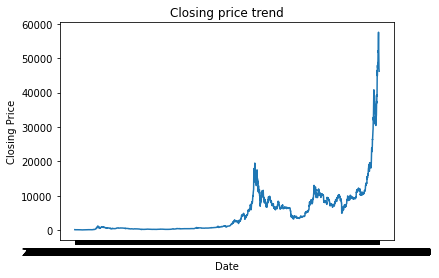

In [ ]:
plt.plot('Date', 'Close', data=df)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing price trend')
plt.savefig('priceTrend.jpg', format='jpg')

In [ ]:
logRegData=df
logRegData['PriceDifference']=logRegData['Open']-logRegData['Close']
logRegData['UpDown']=np.where(logRegData['PriceDifference']>0,0,1)
logRegData['Price'] =logRegData[['Close']].shift(-1)
logRegData['Price'] = logRegData['Price'].fillna(method = 'ffill')

logRegData.head()

'''logRegData['MA_10']=logRegData['Close'].rolling(window=10).mean()
logRegData['MA_20']=logRegData['Close'].rolling(window=20).mean()
logRegData['STD_10']=logRegData['Close'].rolling(window=10).std()
logRegData['STD_20']=logRegData['Close'].rolling(window=20).std()
logRegData['EMA_12']=logRegData['Close'].ewm(span=12,adjust=False).mean()
logRegData['EMA_26']=logRegData['Close'].ewm(span=26,adjust=False).mean()
logRegData['MACD']=logRegData['EMA_12']-logRegData['EMA_26']
logRegData['UpperBollinger']=logRegData['MA_20']+2*logRegData['STD_20']
logRegData['LowerBollinger']=logRegData['MA_20']-2*logRegData['STD_20']

logRegData=logRegData.iloc[20:]'''
logRegData.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,PriceDifference,UpDown,Price
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,-10.095993,1,139.000000
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,5.000000,0,116.989998
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,22.010002,0,105.209999
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,11.169998,0,97.750000
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,8.500000,0,112.500000


In [ ]:
logRegData.corr()

,SNo,High,Low,Open,Close,Volume,Marketcap,PriceDifference,UpDown,Price
SNo,1.000000,0.698823,0.711804,0.704412,0.703350,0.683750,0.700296,-0.053401,0.021288,0.702287
High,0.698823,1.000000,0.998466,0.999172,0.999358,0.811861,0.998529,-0.104623,0.005703,0.997572
Low,0.711804,0.998466,1.000000,0.998568,0.999034,0.808784,0.998439,-0.109336,0.008326,0.997468
Open,0.704412,0.999172,0.998568,1.000000,0.998288,0.811214,0.997531,-0.072341,-0.005014,0.996477
Close,0.703350,0.999358,0.999034,0.998288,1.000000,0.810448,0.999305,-0.130554,0.015899,0.998305
Volume,0.683750,0.811861,0.808784,0.811214,0.810448,1.000000,0.818189,-0.069317,-0.000586,0.809157
Marketcap,0.700296,0.998529,0.998439,0.997531,0.999305,0.818189,1.000000,-0.131535,0.015489,0.997738
PriceDifference,-0.053401,-0.104623,-0.109336,-0.072341,-0.130554,-0.069317,-0.131535,1.000000,-0.356094,-0.132358
UpDown,0.021288,0.005703,0.008326,-0.005014,0.015899,-0.000586,0.015489,-0.356094,1.000000,0.016533
Price,0.702287,0.997572,0.997468,0.996477,0.998305,0.809157,0.997738,-0.132358,0.016533,1.000000


In [ ]:

X = logRegData[['Open','Close','High','Low','Volume','Marketcap']]
y = logRegData[['Price']]
print(y)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
y_train=y_train['Price'].to_list()
y_test=y_test['Price'].to_list()

y= y['Price'].to_list()

             Price
0       139.000000
1       116.989998
2       105.209999
3        97.750000
4       112.500000
...            ...
2857  49705.333316
2858  47093.853019
2859  46339.760083
2860  46188.451275
2861  46188.451275

[2862 rows x 1 columns]


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

X1 = X[['Open','Close']]
y1 = logRegData[['UpDown']]

X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.25)
y1_train=y1_train['UpDown'].to_list()
y1_test=y1_test['UpDown'].to_list()

y1= y1['UpDown'].to_list()

model.fit(X1,y1)

y_pred = model.predict(X1_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
nb = f1_score(y1_test,y_pred,zero_division='warn',average=None).mean()*100
print (accuracy_score(y1_test,y_pred)*100)

54.46927374301676


In [ ]:
from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred)))

Mean Squared Error: 45.530726256983236
Root Mean Squared Error: 0.6747645978930966


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
# Predict on value which model has not seen before
#z=knn.predict([[3,7]])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [ ]:
z = np.round(knn.predict(X_test))
print(z[:5],y_test[:5])

[  467.  3680. 10173.  3669.  5759.] [439.322998046875, 3552.95306759, 9321.78129819, 3843.51996727, 5647.2099609375]


Text(0, 0.5, 'Price')

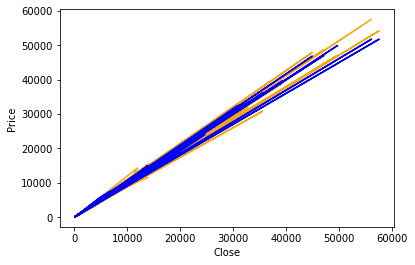

In [ ]:
plt.plot(X_test['Close'],y_test,color="orange")
plt.plot(X_test['Close'],z,color="blue")
plt.xlabel("Close")
plt.ylabel("Price")

In [ ]:
from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, z)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, z)))

Mean Squared Error: 23278861.21658409
Root Mean Squared Error: 482.4817221054502


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
Y_pred = regressor.predict(X_test) # test the output by changing values
#Y_pred = list(np.floor(Y_pred))
y_test[:5]

[439.322998046875,
 3552.95306759,
 9321.78129819,
 3843.51996727,
 5647.2099609375]

In [ ]:
from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

Mean Squared Error: 23469854.90080095
Root Mean Squared Error: 484.4569630091093


Text(0, 0.5, 'Price')

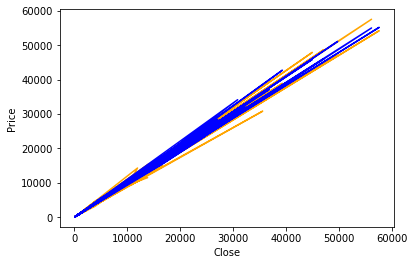

In [ ]:
plt.plot(X_test['Close'],y_test,color="orange")
plt.plot(X_test['Close'],Y_pred,color="blue")
plt.xlabel("Close")
plt.ylabel("Price")

In [ ]:
manual = pd.read_csv('/content/drive/MyDrive/livebitcoindata.csv')
manual.head()
testing = manual
testing['PriceDifference'] = testing['Open']- testing['Close']
testing['UpDown']=np.where(testing['PriceDifference']>0,'0','1')
testing.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,PriceDifference,UpDown
0,2021-04-12 21:40:00+01:00,60225.453125,60225.453125,60215.382812,60220.113281,60220.113281,0,5.339844,0
1,2021-04-12 21:45:00+01:00,60205.773438,60251.160156,60205.773438,60241.347656,60241.347656,0,-35.574219,1
2,2021-04-12 21:50:00+01:00,60247.441406,60247.441406,60236.179688,60238.906250,60238.906250,208896,8.535156,0
3,2021-04-12 21:55:00+01:00,60232.863281,60233.667969,60156.992188,60156.992188,60156.992188,6852608,75.871094,0
4,2021-04-12 22:00:00+01:00,60146.238281,60146.238281,60090.765625,60090.765625,60090.765625,0,55.472656,0


In [ ]:
manual_x = testing[['Open','Close','High','Low','Volume']]
val = model.predict(manual_x)
updown = testing['UpDown'].to_list()

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
manual_x = testing[['Open','Close']]
val1 = knn.predict(manual_x)
updown1 = testing['UpDown'].to_list()

0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
close, open = 49839.8,49704.9		
updown = 1
manual = pd.DataFrame([{'Open':open,'Close':close}])
enc = OrdinalEncoder()
x1 = enc.fit_transform(manual)
#manual = pd.DataFrame([{'Open':open}])
val = m.predict(x1)
if updown == val:
  print('Predicted correctly')
else:
  print('Not predicted correctly')
print(val)

Predicted correctly
[1]


In [ ]:
close, open = 53741.5,	57170.6			
updown = 0
manual = pd.DataFrame([{'Open':open,'Close':close}])
enc = OrdinalEncoder()
x1 = enc.fit_transform(manual)
#manual = pd.DataFrame([{'Open':open}])
val = m.predict(x1)

#manual = pd.DataFrame([{'Open':open}])
#val = model.predict(manual)
if updown == val:
  print('Predicted correctly')
else:
  print('Not predicted correctly')
print(val)

Not predicted correctly
[1]


In [ ]:
close,open,high,low,volume,mar = 36720.5	, 42898.3,	43516.6,	30261.7,	60710000, 41075.8			
manual = pd.DataFrame([{'Open':open,'Close':close,'High':high,'Low':low,'Volume':volume,'Marketcap':mar}])
print(manual)
val = knn.predict(manual)
print(val)

      Open    Close     High      Low    Volume  Marketcap
0  42898.3  36720.5  43516.6  30261.7  60710000    41075.8
[79.18774305]


In [ ]:
close, open = 42897.3	,	36720.5		
updown = 0
manual = pd.DataFrame([{'Close':close}])
val = knn.predict(manual)
#if updown == val:
  #print('Predicted correctly')
#else:
  #print('Not predicted correctly')
print(val)

[19127.5]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
close,open,high,low,volume,mar = 36720.5	, 42898.3,	43516.6,	30261.7,	60710000, 41075.8			
manual = pd.DataFrame([{'Open':open,'Close':close,'High':high,'Low':low,'Volume':volume,'Marketcap':mar}])
val = regressor.predict(manual)
print(val)

[29769.53466546]


In [ ]:
close, open = 49839.8,49704.9			
updown = '1'
manual = pd.DataFrame([{'Open':open,'Close':close}])
Y_pred = list(np.floor(regressor.predict(manual))) # test the output by changing values
if (int(updown)==int(Y_pred[0])):
  print('Correct')
else:
  print('Wrong')

Wrong


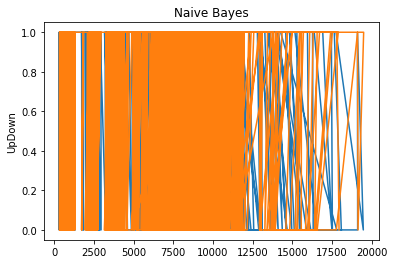

In [ ]:
plt.plot(X,y)
#plt.xlabel('')
plt.ylabel('UpDown')
plt.title('Naive Bayes')
plt.savefig('priceTrend1.jpg', format='jpg')

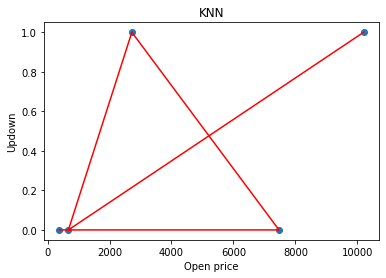

In [ ]:
#x_val =  X_test['MA_10'].to_list()
x_val = X_test['Open'].to_list()
plt.scatter(x_val[:5],y_test[:5])
plt.plot(x_val[:5],z[:5],color="red")
plt.xlabel('Open price')
plt.ylabel('Updown')
plt.title('KNN')
plt.savefig('Pricetrend2.jpg',format='jpg')